In [1]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

In [2]:
train_x_orig , train_y , test_x_orig , test_y , classes = load_data()

y=1


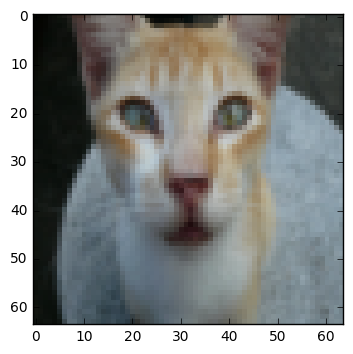

In [3]:
index = 11
plt.imshow(train_x_orig[index])
print("y="+str(train_y[0,index]))

In [4]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]
print(m_train)
print(num_px)
print(m_test)
print(train_x_orig.shape)

209
64
50
(209, 64, 64, 3)


In [5]:
train_x_flatten  = train_x_orig.reshape(train_x_orig.shape[0] , -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T

train_x = train_x_flatten / 255
test_x = test_x_flatten / 255

print(train_x.shape)
print(test_x.shape)

(12288, 209)
(12288, 50)


In [6]:
# exaple of 2 layer model
n_x = 12288
n_h = 7
n_y = 1
layer_dims = (n_x , n_h , n_y)

In [7]:
def two_layer_model(X,Y,layer_dims, learning_rate=0.0075 ,num_iter = 3000 , print_cost = False ):
    np.random.seed(1)
    grads = {}
    costs = []
    m = X.shape[1]
    (n_x , n_h , n_y) = layer_dims
    parameters = initialize_parameters(n_x , n_h , n_y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(num_iter):
        A1 , cache1 = linear_activation_forward(X , W1 , b1 , "relu")
        A2 , cache2 = linear_activation_forward(A1 , W2 , b2 , "sigmoid")
        
        cost = compute_cost(A2,Y)
        
        dA2 = -(np.divide(Y,A2) - np.divide(1-Y,1-A2))
        
        dA1 , dW2 , db2 = linear_activation_backward(dA2 , cache2 , "sigmoid")
        dA0 , dW1 , db1 = linear_activation_backward(dA1 , cache1 , "relu")
        
        grads["dW1"] = dW1
        grads["dW2"] = dW2
        grads["db1"] = db1
        grads["db2"] = db2
        
        parameters = update_parameters(parameters , grads , learning_rate)
        
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        if print_cost and i%100 == 0:
            print("cost after iteration {}:{}".format(i,np.squeeze(cost)))
        
        if print_cost and i%100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iteration (per tens)')
    plt.title("learning rate = " + str(learning_rate))
    plt.show()
    
    return parameters

cost after iteration 0:0.6930497356599888
cost after iteration 100:0.6464320953428849
cost after iteration 200:0.6325140647912677
cost after iteration 300:0.6015024920354665
cost after iteration 400:0.5601966311605748
cost after iteration 500:0.5158304772764729
cost after iteration 600:0.4754901313943325
cost after iteration 700:0.43391631512257495
cost after iteration 800:0.4007977536203889
cost after iteration 900:0.3580705011323798
cost after iteration 1000:0.3394281538366413
cost after iteration 1100:0.3052753636196264
cost after iteration 1200:0.2749137728213016
cost after iteration 1300:0.24681768210614832
cost after iteration 1400:0.1985073503746612
cost after iteration 1500:0.17448318112556635
cost after iteration 1600:0.17080762978095823
cost after iteration 1700:0.11306524562164749
cost after iteration 1800:0.09629426845937161
cost after iteration 1900:0.08342617959726865
cost after iteration 2000:0.07439078704319083
cost after iteration 2100:0.0663074813226793
cost after ite

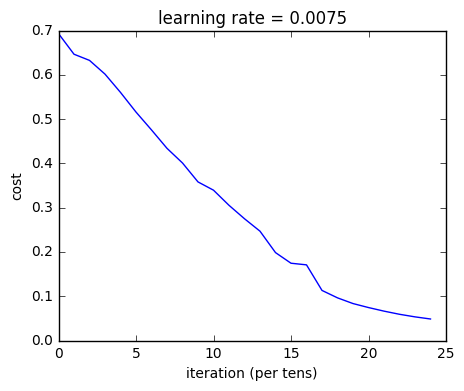

In [8]:
parameters = two_layer_model(train_x, train_y, (n_x, n_h, n_y), num_iter = 2500, print_cost=True)

In [9]:
predictions_train = predict(train_x , train_y , parameters)

Accuracy: 1.0


In [10]:
predictions_test = predict(test_x , test_y , parameters)

Accuracy: 0.72


In [11]:
layers_dims = [12288 , 20 , 7  , 5 ,1]

In [24]:
def L_layer_model(X,Y,layers_dims , learning_rate = 0.0075 , num_iter = 3000, print_cost = False):
    np.random.seed(1)
    costs=[]
    
    parameters = initialize_parameters_deep(layers_dims)
    
    for i in range(num_iter):
        AL , caches = L_model_forward(X , parameters)
        
        cost = compute_cost(AL,Y)
        
        grads = L_model_backward(AL,Y,caches)
        
        parameters = update_parameters(parameters , grads , learning_rate)
        
        if print_cost and i%100==0:
            print("Cost after iteration %i:%f" % (i,cost))
        if print_cost and i%100==0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("learning rate = " + str(learning_rate))
    plt.show()
        
    return parameters

Cost after iteration 0:0.771749
Cost after iteration 100:0.672053
Cost after iteration 200:0.648263
Cost after iteration 300:0.611507
Cost after iteration 400:0.567047
Cost after iteration 500:0.540138
Cost after iteration 600:0.527930
Cost after iteration 700:0.465477
Cost after iteration 800:0.369126
Cost after iteration 900:0.391747
Cost after iteration 1000:0.315187
Cost after iteration 1100:0.272700
Cost after iteration 1200:0.237419
Cost after iteration 1300:0.199601
Cost after iteration 1400:0.189263
Cost after iteration 1500:0.161189
Cost after iteration 1600:0.148214
Cost after iteration 1700:0.137775
Cost after iteration 1800:0.129740
Cost after iteration 1900:0.121225
Cost after iteration 2000:0.113821
Cost after iteration 2100:0.107839
Cost after iteration 2200:0.102855
Cost after iteration 2300:0.100897
Cost after iteration 2400:0.092878


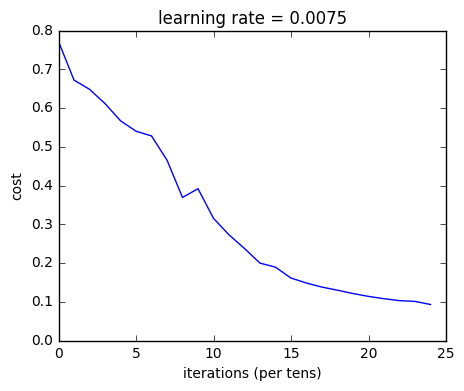

In [25]:
parameters = L_layer_model(train_x , train_y , layers_dims , num_iter =2500 , print_cost = True)

In [26]:
pred_train = predict(train_x , train_y , parameters)

Accuracy: 0.985645933014


In [28]:
pred_test = predict(test_x, test_y , parameters)

Accuracy: 0.8
